# Data prepare
* Import
* load csv data
* explore data


### Import libraries

In [3]:
import io
import os
import h5py
import pandas as pd 
import gc
import sys
sys.path.append('../src/')

from plot import show_bar_plot
from plot import plot_categorical_feature_distribution, plot_target_distribution
from finalmetadata import preprocessing, isnull



### Load csv data

In [5]:
import pandas as pd  # Import pandas before using it

# Use a raw string (r'') or replace \ with /
train_path = r'C:/Users/DELL/OneDrive/Desktop/project/skin_cancer_detection-main/train-metadata.csv'

# Now read the CSV file
df_train = pd.read_csv(train_path, low_memory=False)

# Display first few rows
print(df_train.head())


        isic_id  target  patient_id  age_approx   sex anatom_site_general  \
0  ISIC_0015670       0  IP_1235828        60.0  male     lower extremity   
1  ISIC_0015845       0  IP_8170065        60.0  male           head/neck   
2  ISIC_0015864       0  IP_6724798        60.0  male     posterior torso   
3  ISIC_0015902       0  IP_4111386        65.0  male      anterior torso   
4  ISIC_0024200       0  IP_8313778        55.0  male      anterior torso   

   clin_size_long_diam_mm          image_type tbp_tile_type   tbp_lv_A  ...  \
0                    3.04  TBP tile: close-up     3D: white  20.244422  ...   
1                    1.10  TBP tile: close-up     3D: white  31.712570  ...   
2                    3.40  TBP tile: close-up        3D: XP  22.575830  ...   
3                    3.22  TBP tile: close-up        3D: XP  14.242329  ...   
4                    2.73  TBP tile: close-up     3D: white  24.725520  ...   

    lesion_id  iddx_full  iddx_1  iddx_2  iddx_3  iddx_4  iddx

## Exploration & Preprocessing

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401059 entries, 0 to 401058
Data columns (total 55 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   isic_id                       401059 non-null  object 
 1   target                        401059 non-null  int64  
 2   patient_id                    401059 non-null  object 
 3   age_approx                    398261 non-null  float64
 4   sex                           389542 non-null  object 
 5   anatom_site_general           395303 non-null  object 
 6   clin_size_long_diam_mm        401059 non-null  float64
 7   image_type                    401059 non-null  object 
 8   tbp_tile_type                 401059 non-null  object 
 9   tbp_lv_A                      401059 non-null  float64
 10  tbp_lv_Aext                   401059 non-null  float64
 11  tbp_lv_B                      401059 non-null  float64
 12  tbp_lv_Bext                   401059 non-nul

In [8]:
df_train.describe()

,target,age_approx,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,...,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,mel_thick_mm,tbp_lv_dnn_lesion_confidence
count,401059.000000,398261.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,...,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,63.000000,4.010590e+05
mean,0.000980,58.012986,3.930827,19.974007,14.919247,28.281706,26.913015,34.786341,30.921279,54.653689,...,1.016459,2.715190,2.238605,0.306823,86.332073,-3.091862,1039.598221,55.823389,0.670952,9.716220e+01
std,0.031288,13.596165,1.743068,3.999489,3.529384,5.278676,4.482994,5.708469,4.829345,5.520849,...,0.734631,1.738165,0.623884,0.125038,52.559511,197.257995,409.819653,87.968245,0.792798,8.995782e+00
min,0.000000,5.000000,1.000000,-2.487115,-9.080269,-0.730989,9.237066,3.054228,11.846520,-1.574164,...,0.000000,0.268160,0.636247,0.052034,0.000000,-624.870728,-1052.134000,-291.890442,0.200000,1.261082e-16
25%,0.000000,50.000000,2.840000,17.330821,12.469740,24.704372,23.848125,31.003148,27.658285,51.566273,...,0.563891,1.456570,1.834745,0.211429,40.000000,-147.022125,746.519673,-8.962647,0.300000,9.966882e+01
50%,0.000000,60.000000,3.370000,19.801910,14.713930,28.171570,26.701704,34.822580,30.804893,55.035632,...,0.902281,2.186693,2.149758,0.282297,90.000000,-5.747253,1172.803000,67.957947,0.400000,9.999459e+01
75%,0.000000,70.000000,4.380000,22.304628,17.137175,31.637429,29.679913,38.430298,33.963868,58.298184,...,1.334523,3.474565,2.531443,0.382022,130.000000,140.474835,1342.131540,126.611567,0.600000,9.999996e+01
max,1.000000,85.000000,28.400000,48.189610,37.021680,54.306900,48.372700,58.765170,54.305290,105.875784,...,11.491140,17.563650,25.534791,0.977055,175.000000,614.471700,1887.766846,319.407000,5.000000,1.000000e+02


In [9]:
import pandas as pd  # Ensure pandas is imported

# Check for missing values correctly
df_train.isnull().sum()  # This will show the count of NaN values in each column


isic_id                              0
target                               0
patient_id                           0
age_approx                        2798
sex                              11517
anatom_site_general               5756
clin_size_long_diam_mm               0
image_type                           0
tbp_tile_type                        0
tbp_lv_A                             0
tbp_lv_Aext                          0
tbp_lv_B                             0
tbp_lv_Bext                          0
tbp_lv_C                             0
tbp_lv_Cext                          0
tbp_lv_H                             0
tbp_lv_Hext                          0
tbp_lv_L                             0
tbp_lv_Lext                          0
tbp_lv_areaMM2                       0
tbp_lv_area_perim_ratio              0
tbp_lv_color_std_mean                0
tbp_lv_deltaA                        0
tbp_lv_deltaB                        0
tbp_lv_deltaL                        0
tbp_lv_deltaLB           

In [10]:
isic_id = df_train.iloc[:, 0]
X_train = df_train.iloc[:, 1:-1]
y_train = df_train.iloc[:, -1]

categorical = X_train.select_dtypes(include= ['object'])
numerical = X_train.select_dtypes(exclude= ['object'])
categorical.columns

Index(['patient_id', 'sex', 'anatom_site_general', 'image_type',
       'tbp_tile_type', 'tbp_lv_location', 'tbp_lv_location_simple',
       'attribution', 'copyright_license', 'lesion_id', 'iddx_full', 'iddx_1',
       'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5', 'mel_mitotic_index'],
      dtype='object')

### Descriptive analysis

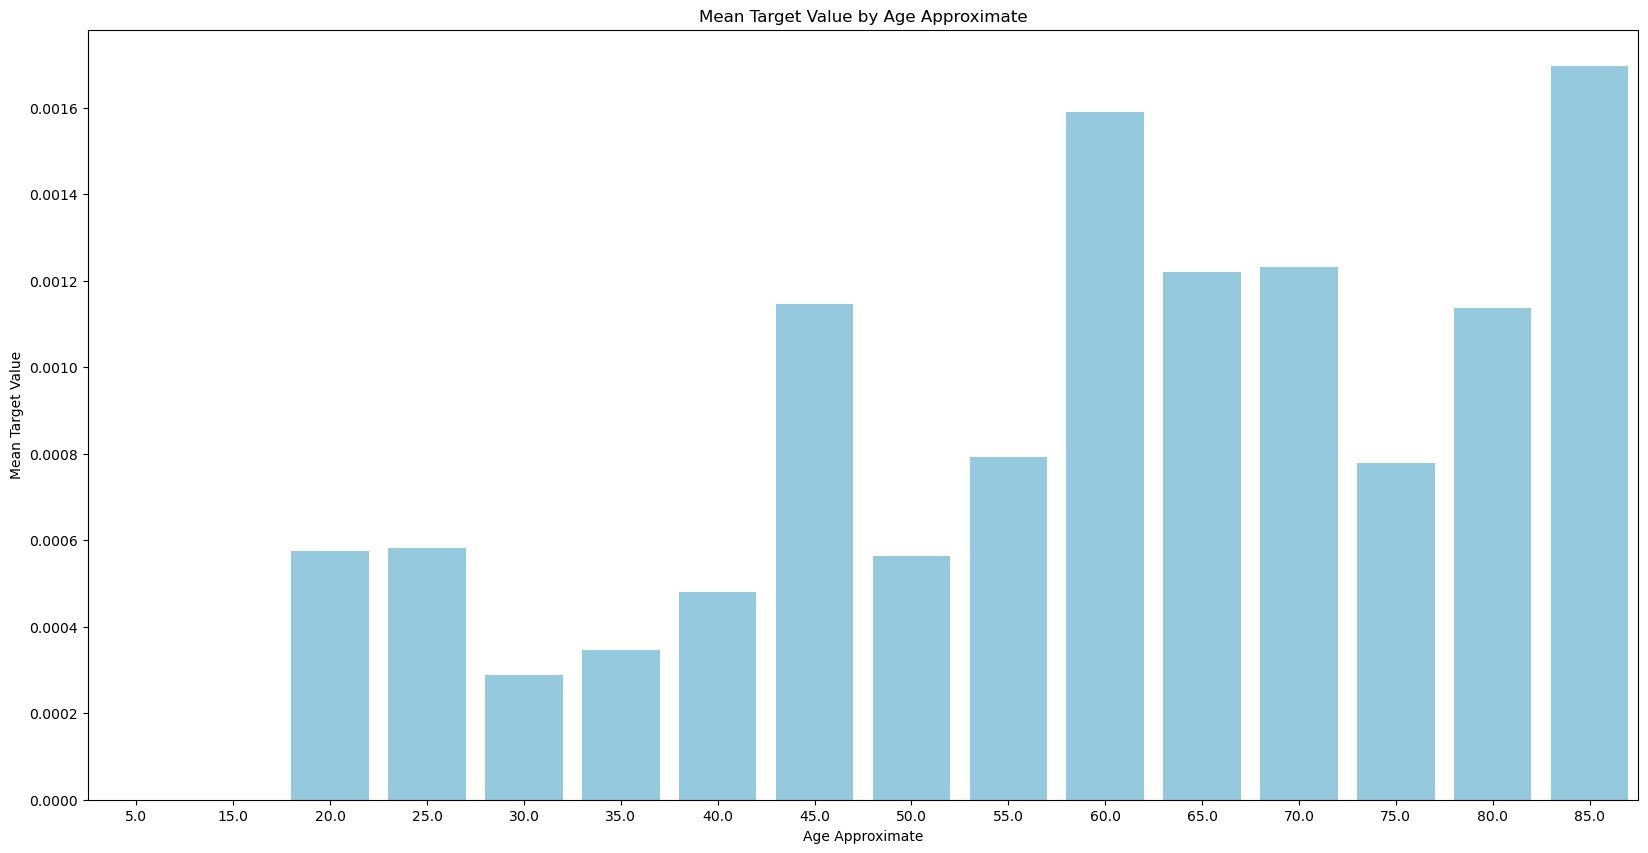

In [12]:
# Assuming 'df_train' is your DataFrame and 'target' is the column you want to plot mean values for
age_target_mean = df_train.groupby('age_approx')['target'].mean()

# Now, plot the data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.barplot(x=age_target_mean.index, y=age_target_mean.values, color='skyblue')

plt.xlabel('Age Approximate')
plt.ylabel('Mean Target Value')
plt.title('Mean Target Value by Age Approximate')
plt.show()


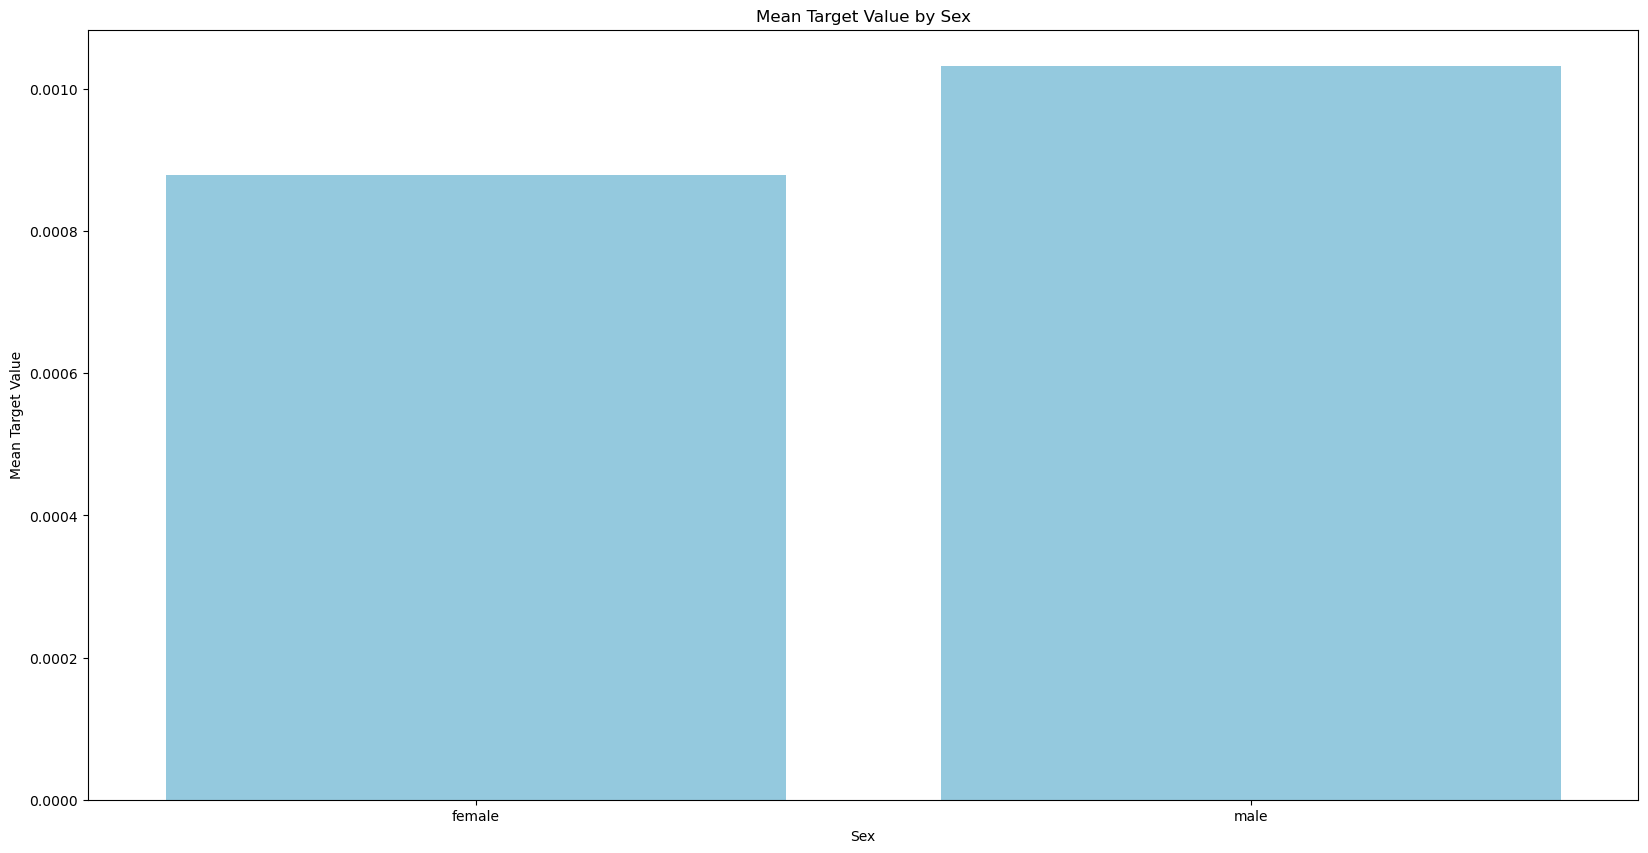

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sex_target_mean = df_train.groupby(['sex'])['target'].mean()

plt.figure(figsize=(20, 10))
sns.barplot(x=sex_target_mean.index, y=sex_target_mean.values, color='skyblue')

plt.xlabel('Sex')
plt.ylabel('Mean Target Value')
plt.title('Mean Target Value by Sex')

plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_15196\3312299592.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_train['target'], palette='coolwarm')


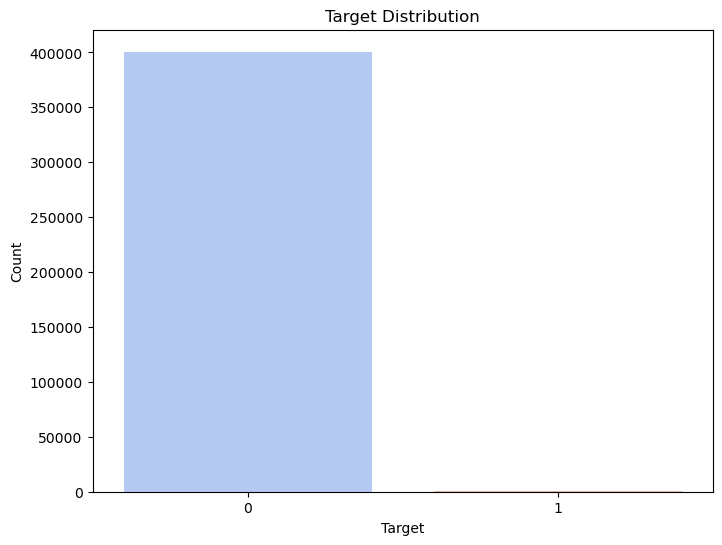

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check if 'target' column exists
if 'target' in df_train.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df_train['target'], palette='coolwarm')

    plt.xlabel('Target')
    plt.ylabel('Count')
    plt.title('Target Distribution')

    plt.show()
else:
    print("The 'target' column is not found in df_train.")


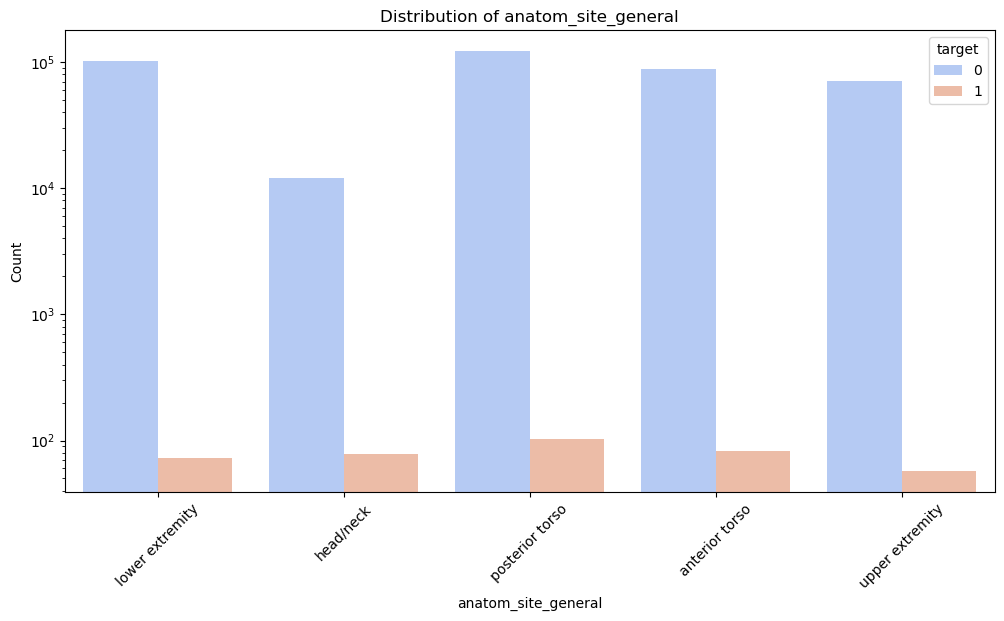

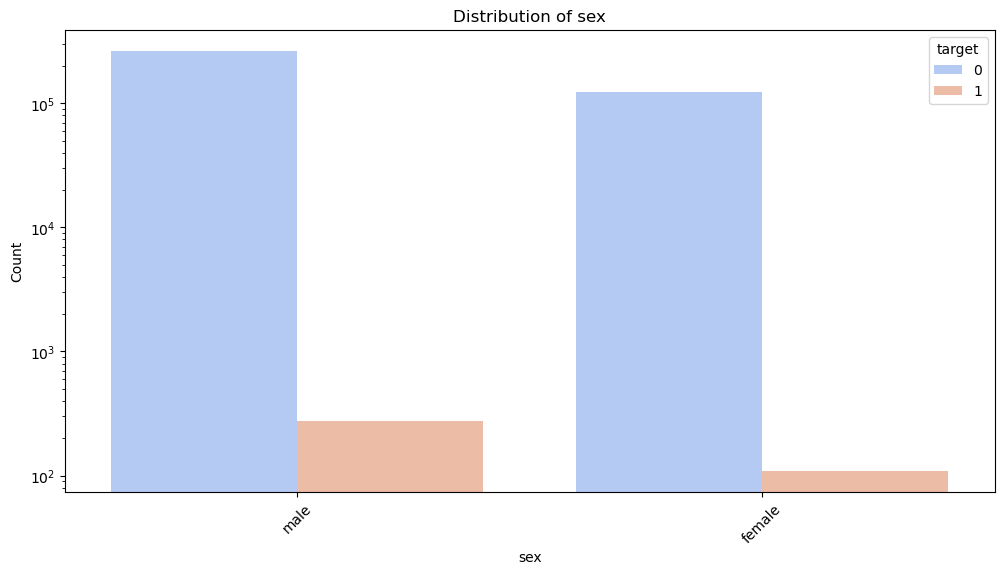

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical_feature_distribution(df, feature, group_by_target=True, stack_bars=False, log_y=False):
    if feature not in df.columns:
        print(f"Feature '{feature}' not found in DataFrame!")
        return
    
    plt.figure(figsize=(12, 6))
    
    if group_by_target and 'target' in df.columns:
        sns.countplot(data=df, x=feature, hue='target', palette='coolwarm')
    else:
        sns.countplot(data=df, x=feature, palette='viridis')

    if log_y:
        plt.yscale("log")

    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(f"Distribution of {feature}")
    plt.xticks(rotation=45)
    
    plt.show()

# Now call the function
plot_categorical_feature_distribution(df_train, 'anatom_site_general', group_by_target=True, log_y=True)
plot_categorical_feature_distribution(df_train, 'sex', group_by_target=True, log_y=True)


#### Columns to drop
* image_type
* tbp_lv_location
* attribution
* copyright_license
* iddx_5

#### Cat columns to convert to OneHot encoding
* sex  -> map({'male': 1, 'female': 0}), fillna(-1)
* tbp_lv_location_simple
* anatom_site_general

In [17]:

# Define path to your dataset
train_path = 'C:/Users/DELL/OneDrive/Desktop/project/skin_cancer_detection-main/train-metadata.csv'

# Call preprocessing function
preprocessing(train_path)

# Now, load the preprocessed data
df_train = pd.read_csv('final_train_data.csv')

# Print the head of the processed data
print(df_train.head())


        isic_id  target  patient_id  age_approx  sex  clin_size_long_diam_mm  \
0  ISIC_0015670       0  IP_1235828        60.0  1.0                    3.04   
1  ISIC_0015845       0  IP_8170065        60.0  1.0                    1.10   
2  ISIC_0015864       0  IP_6724798        60.0  1.0                    3.40   
3  ISIC_0015902       0  IP_4111386        65.0  1.0                    3.22   
4  ISIC_0024200       0  IP_8313778        55.0  1.0                    2.73   

    tbp_lv_A  tbp_lv_Aext   tbp_lv_B  tbp_lv_Bext  ...  \
0  20.244422    16.261975  26.922447    23.954773  ...   
1  31.712570    25.364740  26.331000    24.549290  ...   
2  22.575830    17.128170  37.970460    33.485410  ...   
3  14.242329    12.164757  21.448144    21.121356  ...   
4  24.725520    20.057470  26.464900    25.710460  ...   

   tbp_lv_location_simple_Torso Front  tbp_lv_location_simple_Unknown  \
0                                   0                               0   
1                       

In [18]:
# Final train dataFrame after preprocessing
df_train.head()

,isic_id,target,patient_id,age_approx,sex,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,...,tbp_lv_location_simple_Torso Front,tbp_lv_location_simple_Unknown,anatom_site_general_anterior torso,anatom_site_general_head/neck,anatom_site_general_lower extremity,anatom_site_general_posterior torso,anatom_site_general_upper extremity,anatom_site_general_nan,tbp_tile_type_3D: XP,tbp_tile_type_3D: white
0,ISIC_0015670,0,IP_1235828,60.0,1.0,3.04,20.244422,16.261975,26.922447,23.954773,...,0,0,0,0,1,0,0,0,0,1
1,ISIC_0015845,0,IP_8170065,60.0,1.0,1.10,31.712570,25.364740,26.331000,24.549290,...,0,0,0,1,0,0,0,0,0,1
2,ISIC_0015864,0,IP_6724798,60.0,1.0,3.40,22.575830,17.128170,37.970460,33.485410,...,0,0,0,0,0,1,0,0,1,0
3,ISIC_0015902,0,IP_4111386,65.0,1.0,3.22,14.242329,12.164757,21.448144,21.121356,...,1,0,1,0,0,0,0,0,1,0
4,ISIC_0024200,0,IP_8313778,55.0,1.0,2.73,24.725520,20.057470,26.464900,25.710460,...,1,0,1,0,0,0,0,0,0,1


In [19]:
df_train.describe()

,target,age_approx,sex,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,...,tbp_lv_location_simple_Torso Front,tbp_lv_location_simple_Unknown,anatom_site_general_anterior torso,anatom_site_general_head/neck,anatom_site_general_lower extremity,anatom_site_general_posterior torso,anatom_site_general_upper extremity,anatom_site_general_nan,tbp_tile_type_3D: XP,tbp_tile_type_3D: white
count,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,...,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000
mean,0.000980,58.026849,0.633396,3.930827,19.974007,14.919247,28.281706,26.913015,34.786341,30.921279,...,0.218846,0.014352,0.218846,0.030035,0.256890,0.303950,0.175927,0.014352,0.712870,0.287130
std,0.031288,13.549664,0.538181,1.743068,3.999489,3.529384,5.278676,4.482994,5.708469,4.829345,...,0.413464,0.118937,0.413464,0.170685,0.436919,0.459962,0.380758,0.118937,0.452423,0.452423
min,0.000000,5.000000,-1.000000,1.000000,-2.487115,-9.080269,-0.730989,9.237066,3.054228,11.846520,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,50.000000,0.000000,2.840000,17.330821,12.469740,24.704372,23.848125,31.003148,27.658285,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,60.000000,1.000000,3.370000,19.801910,14.713930,28.171570,26.701704,34.822580,30.804893,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,70.000000,1.000000,4.380000,22.304628,17.137175,31.637429,29.679913,38.430298,33.963868,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,85.000000,1.000000,28.400000,48.189610,37.021680,54.306900,48.372700,58.765170,54.305290,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
# Convert all object columns to categorical type
df_train[df_train.select_dtypes(include=['object']).columns] = df_train.select_dtypes(include=['object']).astype('category')


In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401059 entries, 0 to 401058
Data columns (total 99 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   isic_id                              401059 non-null  category
 1   target                               401059 non-null  int64   
 2   patient_id                           401059 non-null  category
 3   age_approx                           401059 non-null  float64 
 4   sex                                  401059 non-null  float64 
 5   clin_size_long_diam_mm               401059 non-null  float64 
 6   tbp_lv_A                             401059 non-null  float64 
 7   tbp_lv_Aext                          401059 non-null  float64 
 8   tbp_lv_B                             401059 non-null  float64 
 9   tbp_lv_Bext                          401059 non-null  float64 
 10  tbp_lv_C                             401059 non-null  float64 
 11  